In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib

In [3]:
tf.compat.v1.VERSION

'2.0.0-alpha0'

#### set logging for error only

In [4]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32, 46,59,72,100], dtype=float)

for i, c in enumerate(celsius_q):
    print("{} degree Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degree Celsius = -40.0 degrees Fahrenheit
-10.0 degree Celsius = 14.0 degrees Fahrenheit
0.0 degree Celsius = 32.0 degrees Fahrenheit
8.0 degree Celsius = 46.0 degrees Fahrenheit
15.0 degree Celsius = 59.0 degrees Fahrenheit
22.0 degree Celsius = 72.0 degrees Fahrenheit
38.0 degree Celsius = 100.0 degrees Fahrenheit


In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [7]:
model = tf.keras.Sequential([l0])

In [8]:
model.compile(loss='mean_squared_error', 
             optimizer=tf.keras.optimizers.Adam(0.1))

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Finished training model')

Finished training model


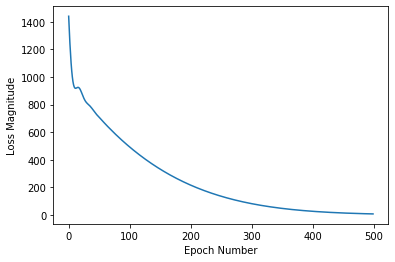

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.show()

In [12]:
print(model.predict([100.00]))

[[211.33736]]


In [13]:
print('there are the layer variables {}'.format(l0.get_weights()))

there are the layer variables [array([[1.8206064]], dtype=float32), array([29.276724], dtype=float32)]


### A Different model

In [15]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.16024967,  0.20464693, -0.76640564,  0.12671086]],
      dtype=float32), array([ 2.953613 ,  3.0934541, -3.3356423, -2.156381 ], dtype=float32)]
These are the l1 variables: [array([[-0.39664763,  0.30600476, -0.98818195,  0.23336177],
       [-0.28667155,  0.5749264 , -0.7967853 , -0.70232236],
       [ 1.0404005 , -0.7846748 ,  0.330962  , -0.21310784],
       [ 0.747017  ,  0.16536835, -0.33141103, -0.07710385]],
      dtype=float32), array([-3.2462707,  3.302368 , -2.9974463,  0.9703098], dtype=float32)]
These are the l2 variables: [array([[-1.572951  ],
       [ 0.6630793 ],
       [-0.79764515],
       [-0.09390382]], dtype=float32), array([3.1872418], dtype=float32)]
